In [2]:
import gdown
import os
# Replace with your file ID
file_id = '13hvMoxNbUD7jn9qe__s8BrTN7zEq1e5i'
output = 'reclamacoes.csv.xz'

if(not os.path.isfile(output)):
    print('Downloading...')
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output, quiet=False)
else:
    print('File already downloaded')

File already downloaded


In [3]:
import pandas as pd

df_original = pd.read_csv(output, compression='xz')

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_97245/1262772472.py:3: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(output, compression='xz')


In [30]:
# filtrando dado da equipe
df = df_original[df_original['Company'] == 'BANK OF AMERICA, NATIONAL ASSOCIATION']

In [156]:

df['Date received'] = pd.to_datetime(df['Date received'])
df['week'] = df['Date received'].dt.strftime('%U')
df['month'] = df['Date received'].dt.strftime('%m')
df['year'] = df['Date received'].dt.strftime('%Y')
df['day_of_week'] = df['Date received'].dt.day_name()
df['day_of_year'] = df['Date received'].dt.dayofyear
df['day_of_month'] = df['Date received'].dt.day

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_97245/1302143256.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_97245/1302143256.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_97245/1302143256.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [54]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,week,year,day_of_week,day_of_year
36,2022-12-19,"Money transfer, virtual currency, or money ser...",International money transfer,Money was not available when promised,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,NaN,...,Web,2023-01-04,Closed with explanation,Yes,NaN,6338577,51,2022,Monday,353
938,2022-12-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I have disputed this BK OF AMER and it has not...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,93021.0,...,Web,2022-12-29,Closed with explanation,Yes,NaN,6376659,52,2022,Thursday,363
1019,2022-12-27,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33130.0,...,Web,2022-12-27,In progress,Yes,NaN,6366854,52,2022,Tuesday,361
1431,2022-12-27,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",AK,99645.0,...,Referral,2022-12-27,In progress,Yes,NaN,6367135,52,2022,Tuesday,361
1722,2022-12-27,Debt collection,Credit card debt,False statements or representation,"Impersonated attorney, law enforcement, or gov...",NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,34474.0,...,Web,2022-12-27,In progress,Yes,NaN,6365930,52,2022,Tuesday,361


# Reclamações

In [9]:
import plotly.express as px

fig = px.histogram(df.groupby('Date received').size(), title='Reclamações', nbins=114)
fig.show()


In [57]:
data = df.groupby(['week']).size()

fig = px.histogram(data, title='Reclamações por semana do ano', nbins=100)
fig.show()

# faça um histograma de reclamações por dia da semana com a probabilidade de reclamação

data = df.groupby(['week']).size() / len(df)

fig = px.bar(data, title='Reclamações por dia da semana', labels={'value': 'Probabilidade de reclamação'})
fig.show()



In [65]:
# crie um grafico de barras das reclamações por ano
data = df.groupby(['year']).size()

fig = px.histogram(data, title='Reclamações por ano', nbins=6)
fig.show()

fig = px.bar(data, title='Reclamações por ano', labels={'value': 'Quantidade de reclamações'})
fig.show()

In [142]:
data = df.groupby(['day_of_year']).size()

fig = px.bar(data, title='Reclamações por dia do ano', x=data.index, y=data.values)
fig.update_layout(xaxis_title='Dia do ano', yaxis_title='Quantidade de reclamações')
fig.show()

# probabilidade de reclamação por dia do ano
data = df.groupby(['day_of_year']).size() / len(df)

fig = px.bar(data, title='Probabilidade de reclamações por dia do ano', labels={'value': 'Probabilidade de reclamação'})
# eixo y em porcentagem
fig.update_layout(xaxis_title='Dia do ano', yaxis_title='Probabilidade de reclamação', yaxis_tickformat=".2%")
fig.show()

# histograma da probabilidade de reclamação por dia do ano
fig = px.histogram(data, title='Probabilidade de reclamações por dia do ano histograma')
fig.update_layout(xaxis_title='Probabilidade de reclamação', yaxis_title='Quantidade de dias', xaxis_tickformat=".2%")
fig.show()


In [155]:
data = df.groupby(['day_of_week']).size()
data = data.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

fig = px.bar(data, title='Reclamações por dia da semana', x=data.index, y=data.values)
fig.update_layout(xaxis_title='dia da semana', yaxis_title='Quantidade de reclamações')
fig.show()

# probabilidade de reclamação por dia da semana
data = df.groupby(['day_of_week']).size() / len(df)
data = data.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

fig = px.bar(data, title='Probabilidade de reclamações por dia da semana', labels={'value': 'Probabilidade de reclamação'})
fig.update_layout(xaxis_title='dia da semana', yaxis_title='Probabilidade de reclamação', yaxis_tickformat=".2%")
fig.show()

# histograma da probabilidade de reclamação por dia da semana
fig = px.histogram(data, title='Probabilidade de reclamações por dia da semana histograma')
fig.update_layout(xaxis_title='Probabilidade de reclamação', yaxis_title='Quantidade de dias', xaxis_tickformat=".2%")
fig.show()

In [175]:


data = df

histogram = data.groupby(['day_of_week', 'year']).size().unstack().T
fig = px.bar(histogram, title='Reclamações por dia da semana', labels={'value': 'Quantidade de reclamações'})
fig.show()

# faça o grafico acima mas com a probabilidade de reclamação em porcentagem
# considerando que cada ano tem uma quantidade diferente de reclamações
# mas deve ser considerado 100% do ano
# todas as barras devem ter a mesma altura
# ex: o eixo x é o ano, o eixo y é a probabilidade de reclamação de 0 a 100%
# a altura da barra é a probabilidade de reclamação daquele dia da semana naquele ano
# a soma de todas as barras de um mesmo ano deve ser 100%
data = df

histogram = data.groupby(['day_of_week', 'year']).size().unstack().T
histogram = histogram.div(histogram.sum(axis=1), axis=0)

fig = px.bar(histogram, title='Probabilidade de reclamações por dia da semana', labels={'value': 'Probabilidade de reclamação'})
fig.update_layout(xaxis_title='Ano', yaxis_title='Probabilidade de reclamação', yaxis_tickformat=".2%")
fig.show()


In [159]:
data = df.groupby(['day_of_month']).size()

fig = px.bar(data, title='Reclamações por dia do mês', x=data.index, y=data.values)
fig.update_layout(xaxis_title='dia do mês', yaxis_title='Quantidade de reclamações')
fig.show()

# probabilidade de reclamação por dia do mês
data = df.groupby(['day_of_month']).size() / len(df)

fig = px.bar(data, title='Probabilidade de reclamações por dia do mês', labels={'value': 'Probabilidade de reclamação'})
fig.update_layout(xaxis_title='dia do mês', yaxis_title='Probabilidade de reclamação', yaxis_tickformat=".2%")
fig.show()

# histograma da probabilidade de reclamação por dia do mês
fig = px.histogram(data, title='Probabilidade de reclamações por dia do mês histograma', nbins=31)
fig.update_layout(xaxis_title='Probabilidade de reclamação', yaxis_title='Quantidade de dias', xaxis_tickformat=".2%")
fig.show()


# distribuição da quantidade de caracteres

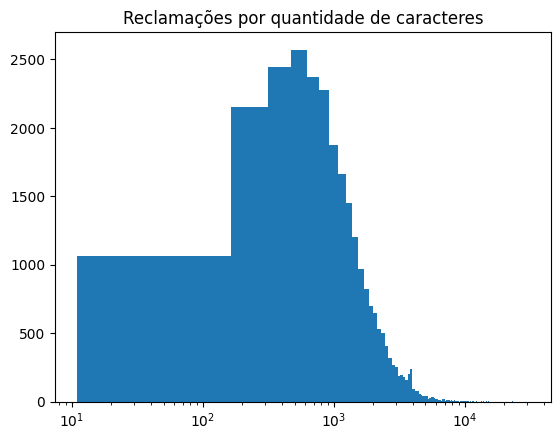

In [105]:
data = df['Consumer complaint narrative'].str.len()

import matplotlib.pyplot as plt

# plt.hist(data, bins=200)
# plt.title('Reclamações por quantidade de caracteres')
# plt.show()

plt.hist(data, bins=200)
plt.title('Reclamações por quantidade de caracteres')
plt.xscale('log')
plt.show()

# CONVERTA PARA PLOTLY

fig = px.histogram(data, title='Reclamações por quantidade de caracteres')
fig.show()

# faça o grafico acima porém com a probabilidade da quantidade de caracteres

data = df['Consumer complaint narrative'].str.len() / len(df)

fig = px.histogram(data, title='Reclamações por quantidade de caracteres (Probabilidade)')
fig.show()


cada dia a fração de reclamação que é de hipoteca


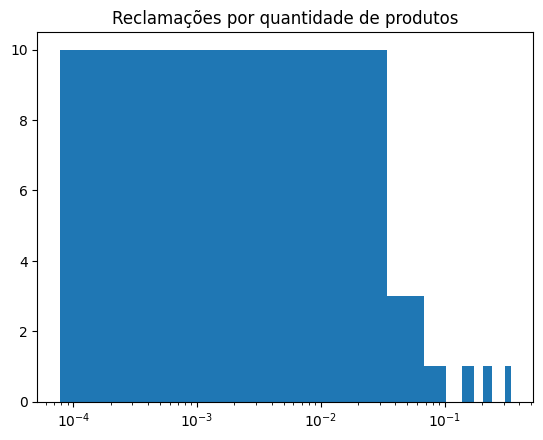

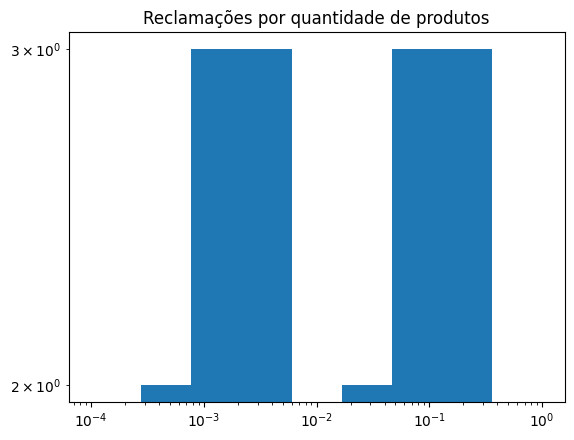

In [188]:
# distribuição de reclamações por produto

data = df.groupby(['Product']).size()

fig = px.bar(data, title='Reclamações por produto', x=data.index, y=data.values)
fig.update_layout(xaxis_title='Produto', yaxis_title='Quantidade de reclamações')
fig.show()

# probabilidade de reclamação por produto
data = df.groupby(['Product']).size() / len(df)

fig = px.bar(data, title='Probabilidade de reclamações por produto', labels={'value': 'Probabilidade de reclamação'})
fig.update_layout(xaxis_title='Produto', yaxis_title='Probabilidade de reclamação', yaxis_tickformat=".2%")
fig.show()

# histograma da probabilidade de reclamação por produto
fig = px.histogram(data, title='Probabilidade de reclamações por produto histograma', nbins=10)
fig.update_layout(xaxis_title='Probabilidade de reclamação', yaxis_title='Quantidade de produtos', xaxis_tickformat=".2%")
fig.show()

# faça o grafico acima com matplotlib
data = df.groupby(['Product']).size() / len(df)

plt.hist(data, bins=10)
plt.title('Reclamações por quantidade de produtos')
plt.xscale('log')
plt.show()

import numpy as np
# logspace
logspace = np.logspace(-4, 0, num=10, base=10)
plt.hist(data, bins=logspace)
plt.title('Reclamações por quantidade de produtos')
plt.xscale('log')
plt.yscale('log')
plt.show()
